<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [33]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import math
from IPython.display import display
import seaborn as sns
%matplotlib inline
# create IoT Analytics client
client = boto3.client('iotanalytics')

In [34]:
filename = "sparrow_"
min_rssi = -60.0
dev_dict = {}
total_devices = 73

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [35]:
dataset = "wifi_diagnostics_dataset"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']
df = pd.read_csv(dataset_url)
df_filtered = df.iloc[:,[0,1]]


# start working with the data

[]


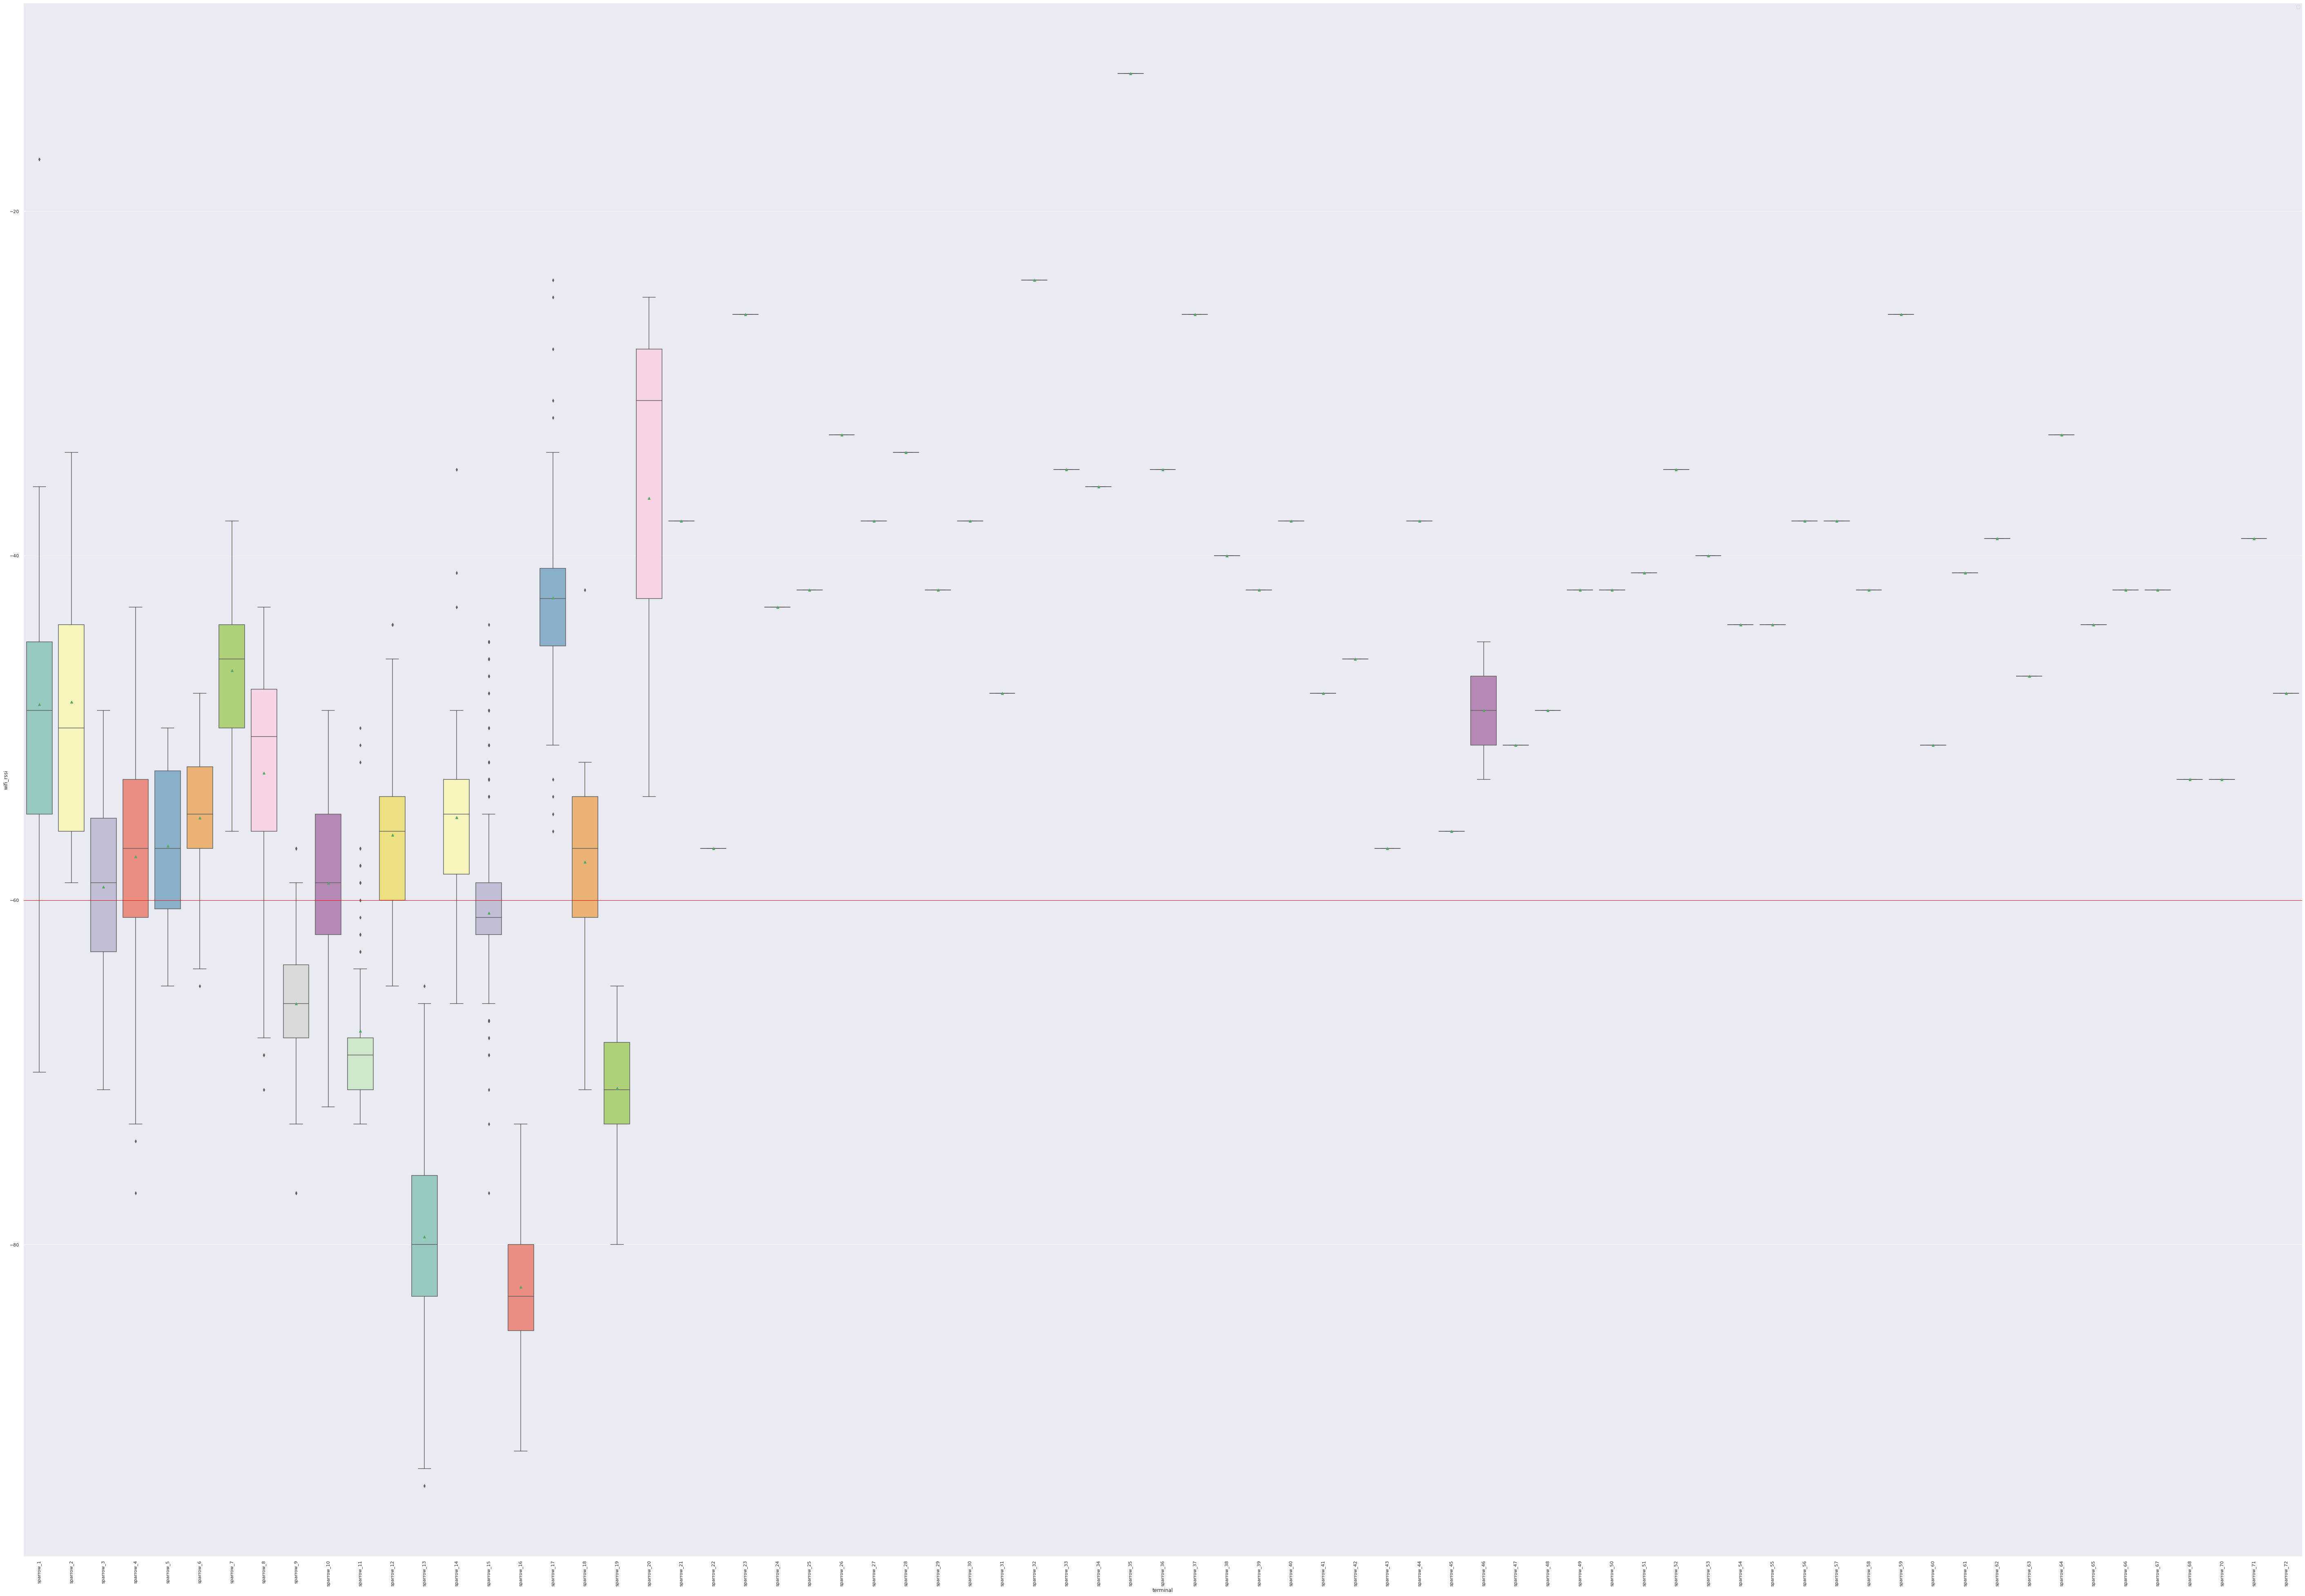

In [43]:
df_filtered['sort'] = df_filtered['terminal'].str.extract('(\d+)', expand=False).astype(int)

#pd.set_option('display.max_rows', 500)

df_filtered.sort_values('sort',inplace=True, ascending=True)
df_filtered = df_filtered.drop('sort', axis=1)

#display(df_filtered)


# boxplot = df_filtered.boxplot(by = ['terminal'], column=['sparrow_1'], rot=90, figsize=(10,10), fontsize = 10)
# plt.axhline(y=min_rssi, linewidth=1, color='red')

sns.set(style="darkgrid")
plt.figure(figsize=(100, 70))
ax = sns.boxplot(x='terminal', y='wifi_rssi', data=df_filtered, palette="Set3", showmeans=True) #, order=["versicolor", "virginica", "setosa"]
plt.xticks(rotation='vertical')
plt.axhline(y=min_rssi, linewidth=1, color='red')
handles, _ = ax.get_legend_handles_labels()
print(handles)
plt.legend(handles)
plt.show()

# df_plot = df_plot.append(df_filtered[df_filtered['terminal'] == 'sparrow_1'])
# for i in range(1,total_devices):
#     DeviceName =  filename + str(i)
#     df_plot.append(df_filtered[df_filtered['terminal'] == DeviceName])
# df_plot.boxplot(by = 'terminal', rot=90, figsize=(10,10), fontsize = 10, return_type='axes')
    
# plt.axhline(y=min_rssi, linewidth=1, color='red')
# plt.show()

In [41]:
for i in range(1,total_devices):
    DeviceName =  filename + str(i)
    mean_rssi = (df_filtered[df_filtered['terminal'] == DeviceName]).mean()
    dev_dict.update({DeviceName: mean_rssi[0]})

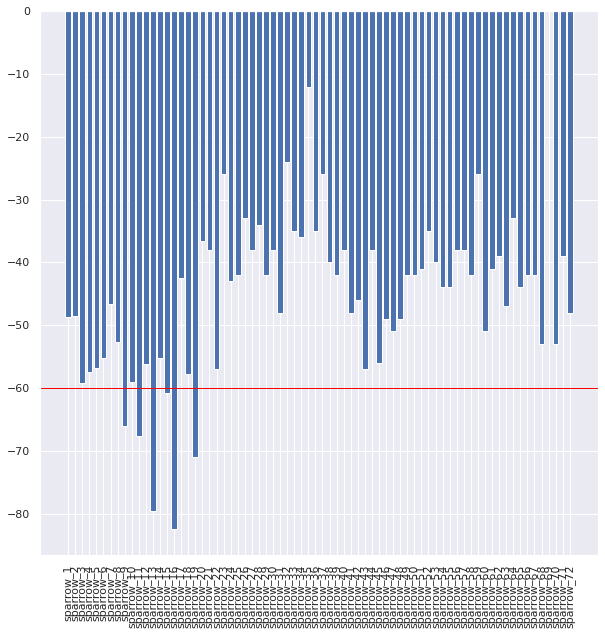

In [42]:
keys = dev_dict.keys()
values = dev_dict.values()
plt.figure(figsize=(10, 10))
plt.bar(keys, values)
plt.xticks(rotation='vertical')
plt.axhline(y=min_rssi, linewidth=1, color='red')
plt.show()